In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
plt.rcParams.update({
                     'xtick.direction':'in',
                     'xtick.top':True,
                     'xtick.bottom':True,
                     'ytick.direction':'in',
                     'ytick.right':True,
                     'ytick.left':True,
})
from time import time

from useful_functions import load_transform_split, color_scatter, scatter_predvreal, get_metric, plot_performance
from RandomSeedSearchCV import RandomSeedSearchCV, randomseed_rfr_maker
from sklearn.ensemble import RandomForestRegressor

from joblib import dump,load

In [31]:
X_train,X_test,y_train,y_test,w_train,w_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                                              weight='COHORT_CNT',
                                                                              expand=False,
                                                                              clean=True,
                                                                              split=0.2,
                                                                              return_pipeline=True,
                                                                              fmt='numpy',
                                                                              random_state=42)

#Normalize weights between 0.3 and 1.0
wmax = np.max([np.max(w_train),np.max(w_test)])
w_train /= wmax
w_test  /= wmax
w_train = 1 - (1-0.3)*(1-w_train)
w_test = 1 - (1-0.3)*(1-w_test)
print(min(w_train),max(w_train))

0.30285714285714294 0.9771428571428572


In [32]:
#Weighted RMSE
def wrmse(model,X,y,w):
    return np.sqrt(np.mean(w*(model.predict(X)-y)**2))
wrmse(best_model,X_test,y_test,w_test)

0.9227558345583571

<IPython.core.display.Javascript object>


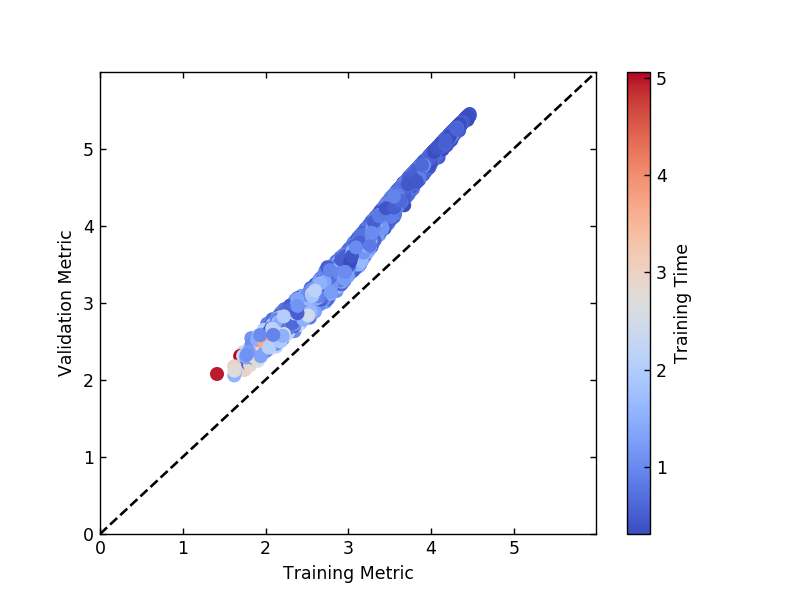

[[2.41110000e+04 1.62287601e+00 2.05735477e+00 1.57138228e+00]
 [3.57690000e+04 1.41387661e+00 2.07603516e+00 4.94896173e+00]
 [7.62300000e+03 1.64858924e+00 2.10482188e+00 2.84647846e+00]
 ...
 [3.40940000e+04 4.46770386e+00 5.42649254e+00 3.17058563e-01]
 [1.59740000e+04 4.44795952e+00 5.42786116e+00 3.14407587e-01]
 [1.08620000e+04 4.46747235e+00 5.44887200e+00 4.29182768e-01]]


<IPython.core.display.Javascript object>


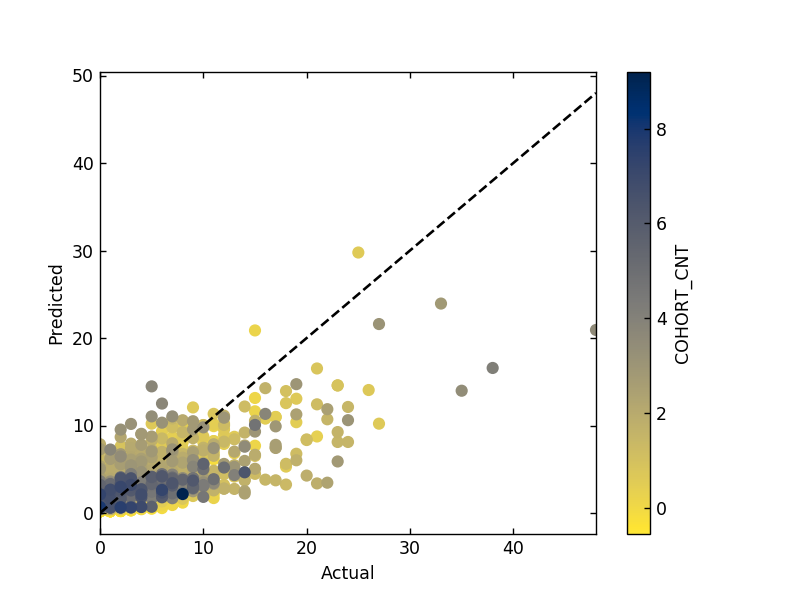

In [33]:
#CAUTION: This cell takes awhile unless you make N smaller.

#Searching through RandomForestRegressor models.
tbl = RandomSeedSearchCV(randomseed_rfr_maker,X_train,y_train,w_train=w_train,N=5000,shield_seed=True,random_state=42,n_jobs=3,cv=1)
print(tbl)

#Get best model.
best_seed = int(tbl[0,0])
best_model = randomseed_rfr_maker(best_seed)
best_model.fit(X_train,y_train)

In [62]:
dump(rfr,'saved_models/best_weighted_rfr_trial2.joblib')
np.savetxt('saved_models/weighted_rfr_randomsearch_trial2.txt',tbl)

<IPython.core.display.Javascript object>


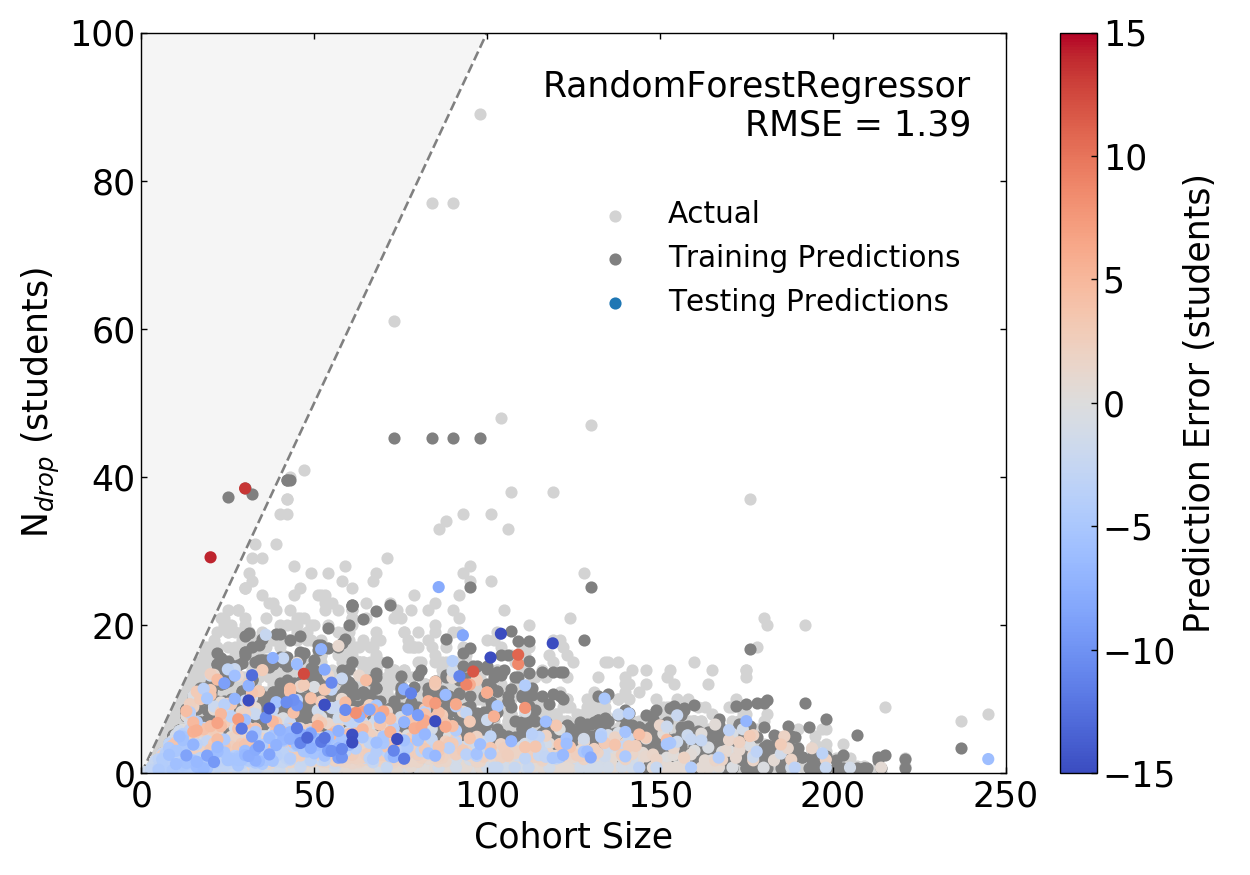

In [61]:
#Make a pretty plot for checkpoint.

#rfr = load('saved_models/best_RandomForestRegressor_DROPOUT_N.joblib')
rfr = randomseed_rfr_maker(int(tbl[3,0]))
rfr.fit(X_train,y_train)
ax = plot_performance(rfr,'RandomForestRegressor',X_train,X_test,y_train,y_test)

plt.tight_layout()
#ax.figure.savefig('figures/rfr_summary.png',dpi=450)